# Reproduction of Fig. 6 of Armand 2020

           Mass [Fe/H]  counts
0  (0.849, 1.0]   Poor     368
1  (0.849, 1.0]  Solar     910
2  (0.849, 1.0]   Rich     408
3   (1.0, 1.15]   Poor     262
4   (1.0, 1.15]  Solar     460
5   (1.0, 1.15]   Rich     216
6   (1.15, 1.3]   Poor      62
7   (1.15, 1.3]  Solar     165
8   (1.15, 1.3]   Rich      80
ball


/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_6133/335734715.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['Mass', '[Fe/H]']).size().reset_index(name='counts')
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_6133/335734715.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('1.0-0.85 Msol', '1.15-1.0 Msol', '1.3-1.15 Msol'))


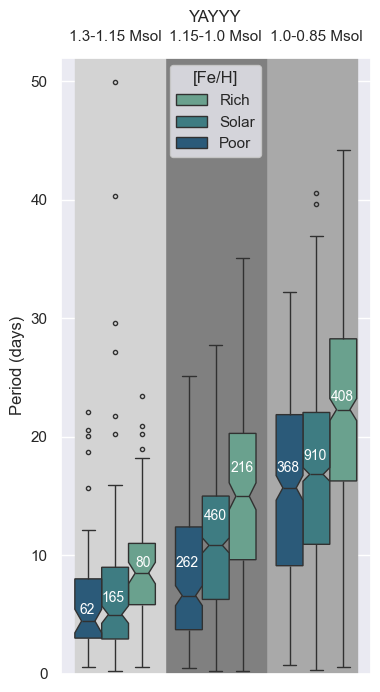

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('result.csv')[['Prot', '[Fe/H]', 'Mass']].dropna()

massbins = pd.cut(data['Mass'], (0.85, 1.0, 1.15, 1.3), include_lowest=True).dropna()
massbins = pd.Series.dropna(massbins)
fehbins = pd.cut(data['[Fe/H]'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()

data = data.drop(['[Fe/H]', 'Mass'], axis=1)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)
data = data.merge(massbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['Mass', '[Fe/H]']).size().reset_index(name='counts')
print(counts)

plt.figure(figsize=(4,8))
ax = sns.boxplot(data=data, x='Mass', y='Prot', orient='v', hue='[Fe/H]', hue_order=('Rich', 'Solar', 'Poor'), palette='crest', fliersize=3, notch=True)

# plot info
ax.set_title('YAYYY')
ax.set_ylabel('Period (days)')
ax.set_xlabel('')
ax.set_ylim(0, 52)
ax.set_xticklabels(('1.0-0.85 Msol', '1.15-1.0 Msol', '1.3-1.15 Msol'))
ax.invert_xaxis()
ax.tick_params(axis='x', labeltop=True, labelbottom=False)
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# number of observations per box
ax.text(-0.14, 23, '408', size='small', color='w')
ax.text(0.13, 18, '910', size='small', color='w')
ax.text(0.4, 17, '368', size='small', color='w')
ax.text(0.85, 17, '216', size='small', color='w')
ax.text(1.12, 13, '460', size='small', color='w')
ax.text(1.4, 9, '262', size='small', color='w')
ax.text(1.8, 9, '80', size='small', color='w')
ax.text(2.14, 6, '165', size='small', color='w')
ax.text(2.35, 5, '62', size='small', color='w')

print('ball')
